# Detecting Maclicious URLs using Machine Learning<br>
The malicious urls can be detected using the lexical features along with tokenization of the url strings. I aim to build a basic binary classifier which would help classify the URLs as malicious or benign.

Steps followed in building the machine learning classifier<br>
1. Data Preprocessing / Feature Engineering
2. Data Visualization
3. Building Machine Learning Models using Lexical Features.
4. Building Machine Learning Models using Lexical Features and Tokenization. (Will Update this part)

Importing The Dependencies

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
urldata = pd.read_csv("urldata_to_run.csv")

In [3]:
urldata.head()

,Unnamed: 0,url,label
0,0,https://www.google.com,good
1,1,https://www.youtube.com,good
2,2,https://www.facebook.com,good
3,3,https://www.baidu.com,good
4,4,https://www.wikipedia.org,good


In [4]:
#Removing the unnamed columns as it is not necesary.
urldata = urldata.drop('Unnamed: 0',axis=1)

In [5]:
urldata.head()

,url,label
0,https://www.google.com,good
1,https://www.youtube.com,good
2,https://www.facebook.com,good
3,https://www.baidu.com,good
4,https://www.wikipedia.org,good


In [6]:
urldata.shape

(450180, 2)

In [7]:
urldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450180 entries, 0 to 450179
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     450180 non-null  object
 1   label   450180 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


Checking Missing Values

In [8]:
urldata.isnull().sum()

url      0
label    0
dtype: int64

### 1.1 Length Features

In [9]:
#Importing dependencies
from urllib.parse import urlparse
from tld import get_tld
import os.path

In [10]:
#Length of URL
urldata['url_length'] = urldata['url'].apply(lambda i: len(str(i)))

In [11]:
#Hostname Length
urldata['hostname_length'] = urldata['url'].apply(lambda i: len(urlparse(i).netloc))

In [12]:
#Path Length
urldata['path_length'] = urldata['url'].apply(lambda i: len(urlparse(i).path))

In [13]:
#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

urldata['fd_length'] = urldata['url'].apply(lambda i: fd_length(i))

In [14]:
#Length of Top Level Domain
urldata['tld'] = urldata['url'].apply(lambda i: get_tld(i,fail_silently=True))
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

urldata['tld_length'] = urldata['tld'].apply(lambda i: tld_length(i))

In [15]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld,tld_length
0,https://www.google.com,good,22,14,0,0,com,3
1,https://www.youtube.com,good,23,15,0,0,com,3
2,https://www.facebook.com,good,24,16,0,0,com,3
3,https://www.baidu.com,good,21,13,0,0,com,3
4,https://www.wikipedia.org,good,25,17,0,0,org,3


In [16]:
urldata = urldata.drop("tld",1)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


Dataset after extracting length features

In [17]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length
0,https://www.google.com,good,22,14,0,0,3
1,https://www.youtube.com,good,23,15,0,0,3
2,https://www.facebook.com,good,24,16,0,0,3
3,https://www.baidu.com,good,21,13,0,0,3
4,https://www.wikipedia.org,good,25,17,0,0,3


### 1.2 Count Features

In [18]:
urldata['count-'] = urldata['url'].apply(lambda i: i.count('-'))
urldata['count@'] = urldata['url'].apply(lambda i: i.count('@'))
urldata['count?'] = urldata['url'].apply(lambda i: i.count('?'))
urldata['count%'] = urldata['url'].apply(lambda i: i.count('%'))
urldata['count.'] = urldata['url'].apply(lambda i: i.count('.'))
urldata['count='] = urldata['url'].apply(lambda i: i.count('='))
urldata['count-http'] = urldata['url'].apply(lambda i : i.count('http'))
urldata['count-https'] = urldata['url'].apply(lambda i : i.count('https'))
urldata['count-www'] = urldata['url'].apply(lambda i: i.count('www'))

In [19]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
urldata['count-digits']= urldata['url'].apply(lambda i: digit_count(i))

In [20]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
urldata['count-letters']= urldata['url'].apply(lambda i: letter_count(i))

In [21]:
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
urldata['count_dir'] = urldata['url'].apply(lambda i: no_of_dir(i))

Data after extracting Count Features

In [22]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,count%,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir
0,https://www.google.com,good,22,14,0,0,3,0,0,0,0,2,0,1,1,1,0,17,0
1,https://www.youtube.com,good,23,15,0,0,3,0,0,0,0,2,0,1,1,1,0,18,0
2,https://www.facebook.com,good,24,16,0,0,3,0,0,0,0,2,0,1,1,1,0,19,0
3,https://www.baidu.com,good,21,13,0,0,3,0,0,0,0,2,0,1,1,1,0,16,0
4,https://www.wikipedia.org,good,25,17,0,0,3,0,0,0,0,2,0,1,1,1,0,20,0


### 1.3 Binary Features

In [23]:
import re

In [24]:
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return -1
    else:
        # print 'No matching pattern found'
        return 1
urldata['use_of_ip'] = urldata['url'].apply(lambda i: having_ip_address(i))

In [25]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return -1
    else:
        return 1
urldata['short_url'] = urldata['url'].apply(lambda i: shortening_service(i))

Data after extracting Binary Features

In [26]:
urldata.head()

,url,label,url_length,hostname_length,path_length,fd_length,tld_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,good,22,14,0,0,3,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,good,23,15,0,0,3,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,good,24,16,0,0,3,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,https://www.baidu.com,good,21,13,0,0,3,0,0,0,...,2,0,1,1,1,0,16,0,1,1
4,https://www.wikipedia.org,good,25,17,0,0,3,0,0,0,...,2,0,1,1,1,0,20,0,1,1


# 2. Data Visualization

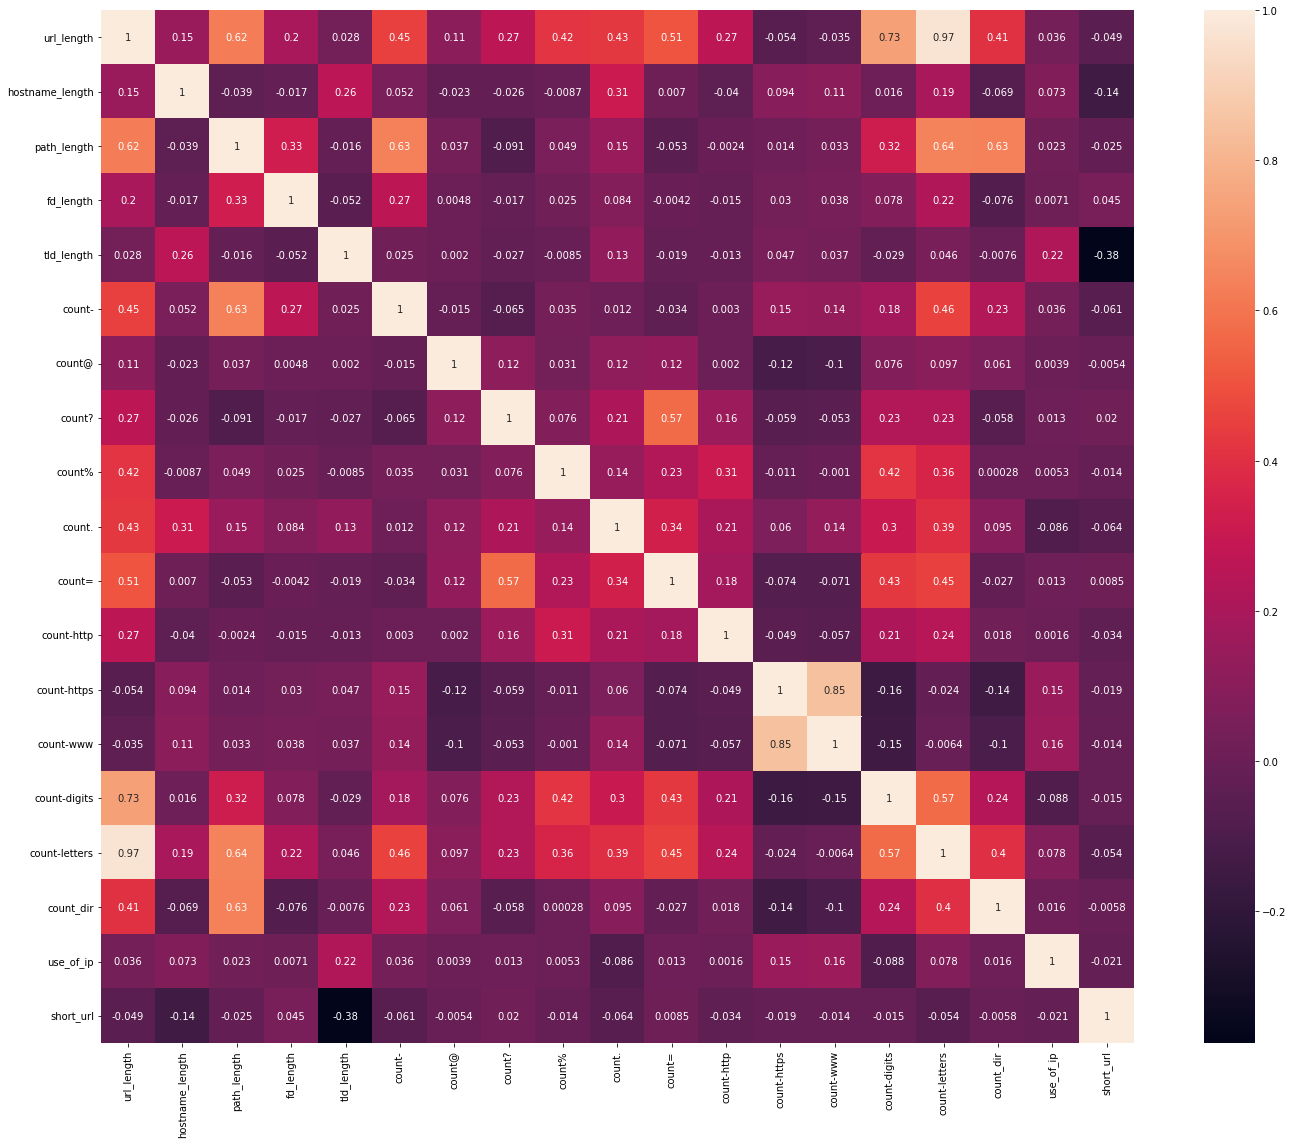

In [27]:
#Heatmap
corrmat = urldata.corr()
f, ax = plt.subplots(figsize=(25,19))
sns.heatmap(corrmat, square=True, annot = True, annot_kws={'size':10})

Text(0, 0.5, 'Number Of URLs')

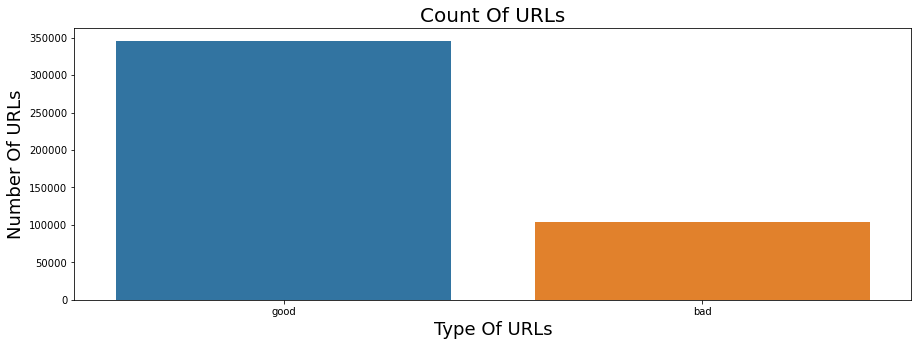

In [28]:
plt.figure(figsize=(15,5))
sns.countplot(x='label',data=urldata)
plt.title("Count Of URLs",fontsize=20)
plt.xlabel("Type Of URLs",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

In [29]:
print("Percent Of Malicious URLs:{:.2f} %".format(len(urldata[urldata['label']=='malicious'])/len(urldata['label'])*100))
print("Percent Of Benign URLs:{:.2f} %".format(len(urldata[urldata['label']=='benign'])/len(urldata['label'])*100))

Percent Of Malicious URLs:0.00 %
Percent Of Benign URLs:0.00 %


The data shows a class imbalance to some extent.

(0.0, 1000.0)

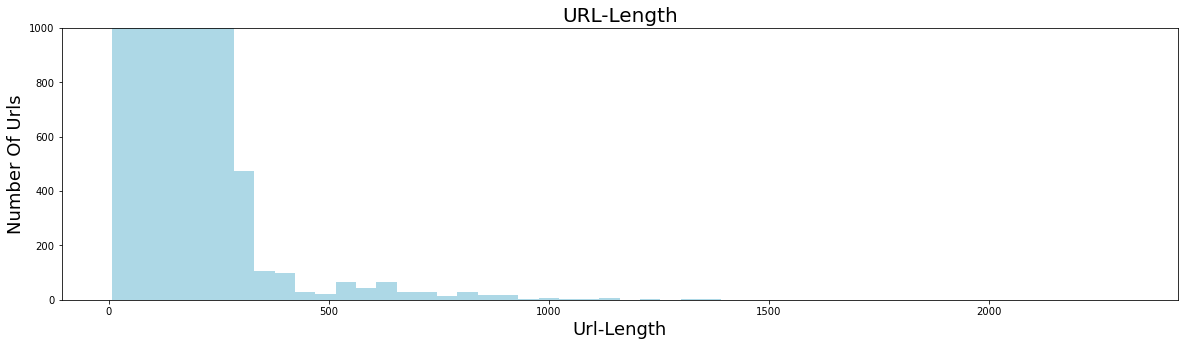

In [30]:
plt.figure(figsize=(20,5))
plt.hist(urldata['url_length'],bins=50,color='LightBlue')
plt.title("URL-Length",fontsize=20)
plt.xlabel("Url-Length",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)


(0.0, 1000.0)

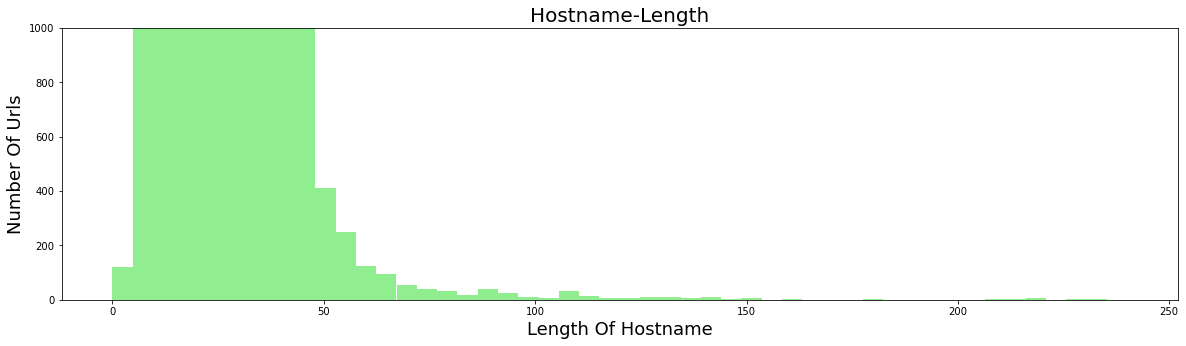

In [31]:
plt.figure(figsize=(20,5))
plt.hist(urldata['hostname_length'],bins=50,color='Lightgreen')
plt.title("Hostname-Length",fontsize=20)
plt.xlabel("Length Of Hostname",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

(0.0, 1000.0)

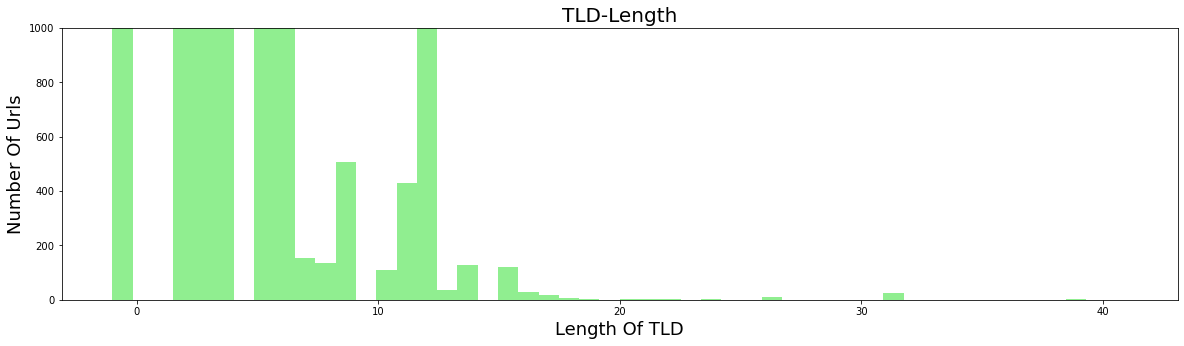

In [32]:
plt.figure(figsize=(20,5))
plt.hist(urldata['tld_length'],bins=50,color='Lightgreen')
plt.title("TLD-Length",fontsize=20)
plt.xlabel("Length Of TLD",fontsize=18)
plt.ylabel("Number Of Urls",fontsize=18)
plt.ylim(0,1000)

Text(0, 0.5, 'Number Of URLs')

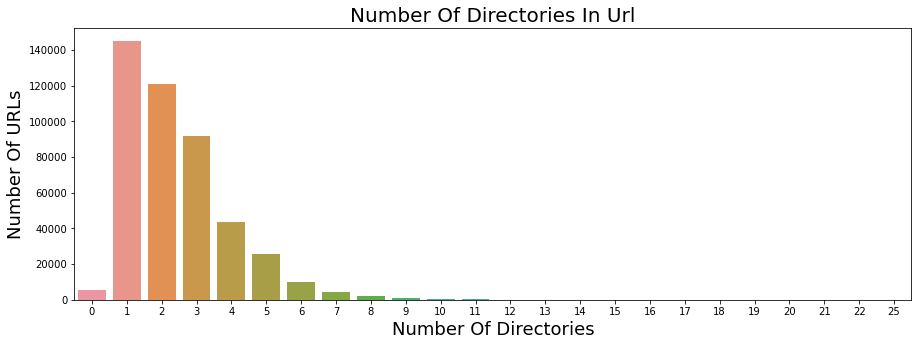

In [33]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata)
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

Text(0, 0.5, 'Number Of URLs')

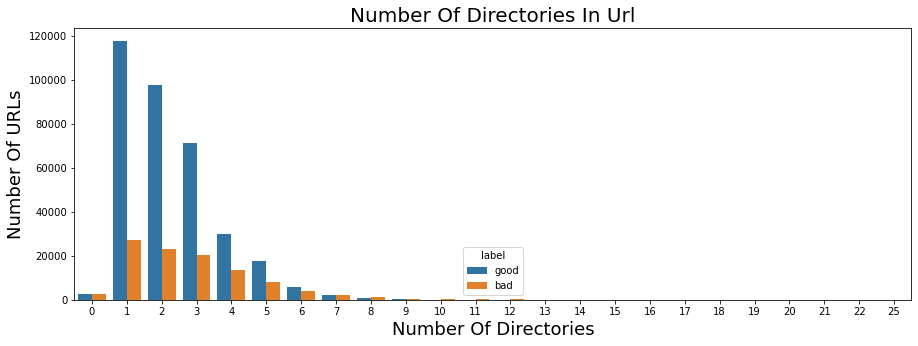

In [34]:
plt.figure(figsize=(15,5))
plt.title("Number Of Directories In Url",fontsize=20)
sns.countplot(x='count_dir',data=urldata,hue='label')
plt.xlabel("Number Of Directories",fontsize=18)
plt.ylabel("Number Of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

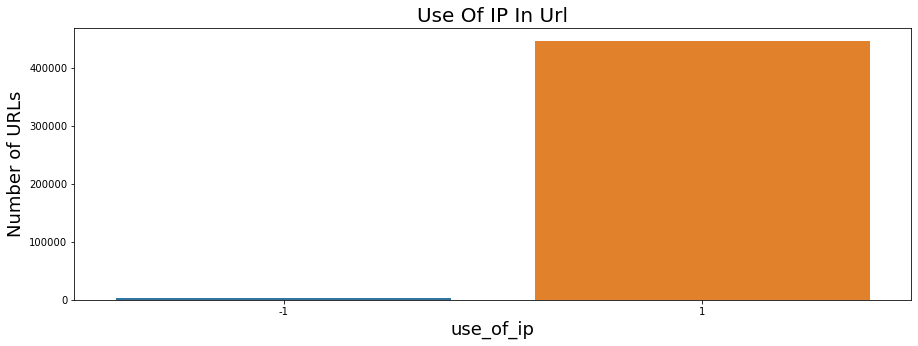

In [35]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)

sns.countplot(urldata['use_of_ip'])
plt.ylabel("Number of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

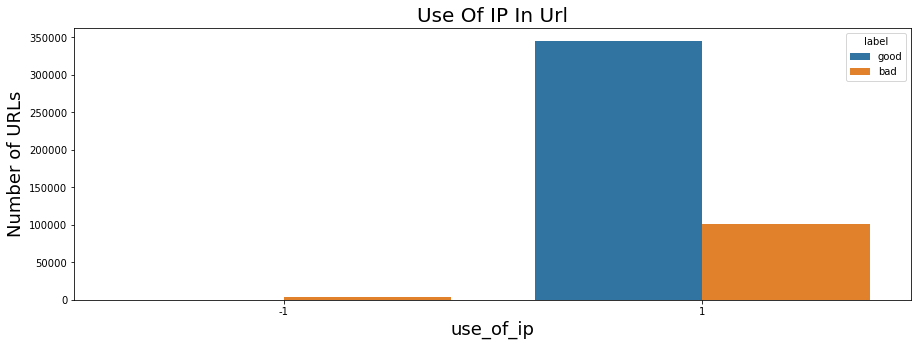

In [36]:
plt.figure(figsize=(15,5))
plt.title("Use Of IP In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
sns.countplot(urldata['use_of_ip'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

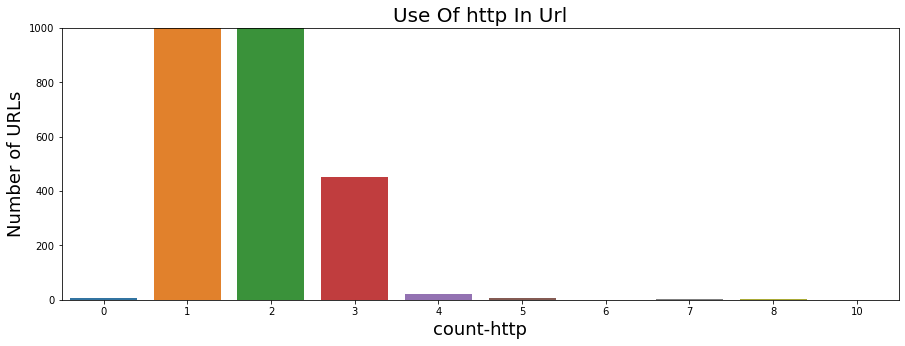

In [37]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Use Of IP",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'])
plt.ylabel("Number of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

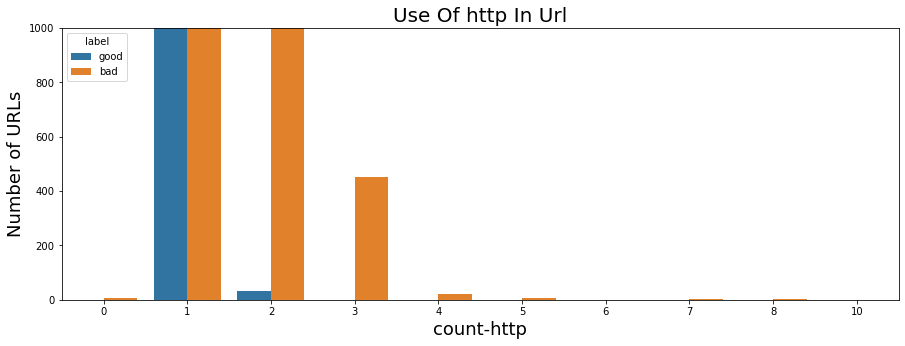

In [38]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)
plt.ylabel("Number of URLs",fontsize=18)
plt.ylim((0,1000))
sns.countplot(urldata['count-http'],hue='label',data=urldata)
plt.ylabel("Number of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of URLs')

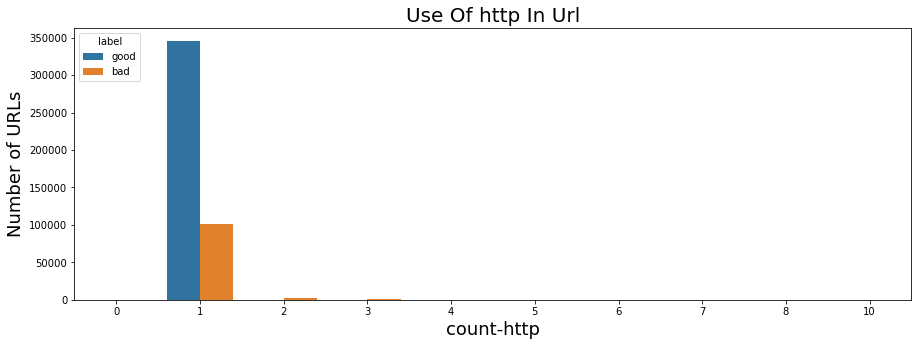

In [39]:
plt.figure(figsize=(15,5))
plt.title("Use Of http In Url",fontsize=20)
plt.xlabel("Count Of http",fontsize=18)

sns.countplot(urldata['count-http'],hue='label',data=urldata)

plt.ylabel("Number of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

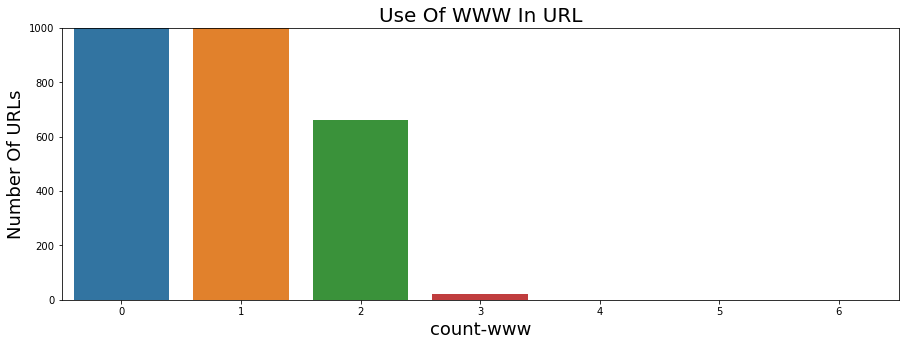

In [40]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)
sns.countplot(urldata['count-www'])
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number Of URLs')

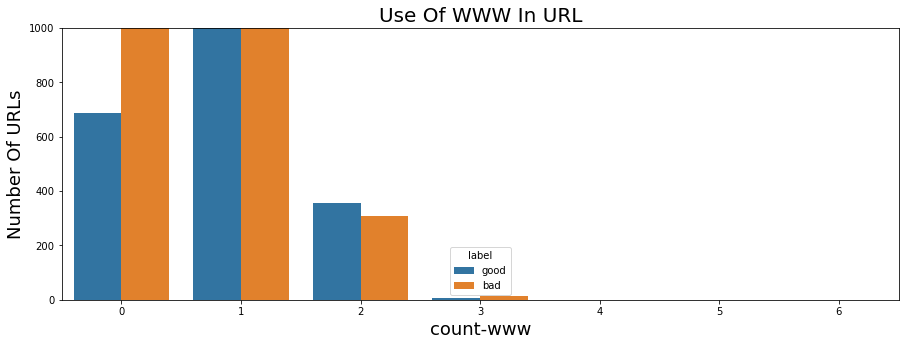

In [41]:
plt.figure(figsize=(15,5))
plt.title("Use Of WWW In URL",fontsize=20)
plt.xlabel("Count Of WWW",fontsize=18)

sns.countplot(urldata['count-www'],hue='label',data=urldata)
plt.ylim(0,1000)
plt.ylabel("Number Of URLs",fontsize=18)

## 3. Building Models Using Lexical Features Only

I will be using three models for my classification.
<br>1. Logistic Regression
<br>2. Decision Trees
<br>3. Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression



In [43]:
#Predictor Variables
x = urldata[['hostname_length',
       'path_length', 'fd_length', 'tld_length', 'count-', 'count@', 'count?',
       'count%', 'count.', 'count=', 'count-http','count-https', 'count-www', 'count-digits',
       'count-letters', 'count_dir', 'use_of_ip']]

#Target Variable
y = urldata['label']

In [44]:
x.shape

(450180, 17)

In [45]:
y.shape

(450180,)

In [46]:
#Splitting the data into Training and Testing
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=42)

In [ ]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

log_predictions = log_model.predict(x_test)
accuracy_score(y_test,log_predictions)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_predictions = rfc.predict(x_test)
accuracy_score(y_test, rfc_predictions)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

dt_predictions = dt_model.predict(x_test)
accuracy_score(y_test,dt_predictions)

In [ ]:
"""xyz = [["http://unitedenergyinc.net/shawneephototours/drop"]]
urldata1 = pd.DataFrame(xyz, columns = ["url"])
urldata1"""

In [ ]:
"""# urldata1['url_length'] = urldata1['url'].apply(lambda i: len(str(i)))
urldata1['hostname_length'] = urldata1['url'].apply(lambda i: len(urlparse(i).netloc))
urldata1['path_length'] = urldata1['url'].apply(lambda i: len(urlparse(i).path))
urldata1['fd_length'] = urldata1['url'].apply(lambda i: fd_length(i))
urldata1['tld'] = urldata1['url'].apply(lambda i: get_tld(i,fail_silently=True))
urldata1['tld_length'] = urldata1['tld'].apply(lambda i: tld_length(i))
urldata1['count-'] = urldata1['url'].apply(lambda i: i.count('-'))
urldata1['count@'] = urldata1['url'].apply(lambda i: i.count('@'))
urldata1['count?'] = urldata1['url'].apply(lambda i: i.count('?'))
urldata1['count%'] = urldata1['url'].apply(lambda i: i.count('%'))
urldata1['count.'] = urldata1['url'].apply(lambda i: i.count('.'))
urldata1['count='] = urldata1['url'].apply(lambda i: i.count('='))
urldata1['count-http'] = urldata1['url'].apply(lambda i : i.count('http'))
urldata1['count-https'] = urldata1['url'].apply(lambda i : i.count('https'))
urldata1['count-www'] = urldata1['url'].apply(lambda i: i.count('www'))
urldata1['count-digits']= urldata1['url'].apply(lambda i: digit_count(i))
urldata1['count-letters']= urldata1['url'].apply(lambda i: letter_count(i))
urldata1['count_dir'] = urldata1['url'].apply(lambda i: no_of_dir(i))
urldata1['use_of_ip'] = urldata1['url'].apply(lambda i: having_ip_address(i))
# urldata1['short_url'] = urldata1['url'].apply(lambda i: shortening_service(i))
urldata1 = urldata1.drop(['url', 'tld'], axis=1)
new_data = np.array(urldata1)
prediction = log_model.predict(new_data)
prediction"""

In [53]:
import gradio as gr

def predictions(urldata1):
    urldata1 = pd.DataFrame([urldata1], columns = ["url"])
    urldata1['hostname_length'] = urldata1['url'].apply(lambda i: len(urlparse(i).netloc))
    urldata1['path_length'] = urldata1['url'].apply(lambda i: len(urlparse(i).path))
    urldata1['fd_length'] = urldata1['url'].apply(lambda i: fd_length(i))
    urldata1['tld'] = urldata1['url'].apply(lambda i: get_tld(i,fail_silently=True))
    urldata1['tld_length'] = urldata1['tld'].apply(lambda i: tld_length(i))
    urldata1['count-'] = urldata1['url'].apply(lambda i: i.count('-'))
    urldata1['count@'] = urldata1['url'].apply(lambda i: i.count('@'))
    urldata1['count?'] = urldata1['url'].apply(lambda i: i.count('?'))
    urldata1['count%'] = urldata1['url'].apply(lambda i: i.count('%'))
    urldata1['count.'] = urldata1['url'].apply(lambda i: i.count('.'))
    urldata1['count='] = urldata1['url'].apply(lambda i: i.count('='))
    urldata1['count-http'] = urldata1['url'].apply(lambda i : i.count('http'))
    urldata1['count-https'] = urldata1['url'].apply(lambda i : i.count('https'))
    urldata1['count-www'] = urldata1['url'].apply(lambda i: i.count('www'))
    urldata1['count-digits']= urldata1['url'].apply(lambda i: digit_count(i))
    urldata1['count-letters']= urldata1['url'].apply(lambda i: letter_count(i))
    urldata1['count_dir'] = urldata1['url'].apply(lambda i: no_of_dir(i))
    urldata1['use_of_ip'] = urldata1['url'].apply(lambda i: having_ip_address(i))
    urldata1 = urldata1.drop(['url', 'tld'], axis=1)
    
    count_mal=0
    count_ben=0
    
    new_data1 = np.array(urldata1)
    prediction1 = log_model.predict(new_data1)
    prediction2= dt_model.predict(new_data1)
    prediction3= rfc.predict(new_data1)
    if prediction1[0] == 'bad':
        count_mal+=1
    else:
        count_ben+=1
    
    if prediction2[0] == 'bad':
        count_mal+=1
    else:
        count_ben+=1
    
    if prediction3[0] == 'bad':
        count_mal+=1
    else:
        count_ben+=1
        
    if(count_mal>count_ben):
        return "Malicious "
    else:
        return "Benign "
    
        
def something(hello):
    print("Hello" + hello)

iface = gr.Interface(
  fn=predictions,
  inputs=["text"],
  outputs=["text"])
   #interpretation="default"
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://46089.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x16cc07add88>,
 'http://127.0.0.1:7860/',
 'https://46089.gradio.app')

In [54]:
y_test



272065    good
396109     bad
404908     bad
158633    good
347216     bad
          ... 
163013    good
253854    good
228050    good
151656    good
431082     bad
Name: label, Length: 315126, dtype: object

In [55]:
import csv
from csv import writer
from csv import reader

rows=[]
file = open("urldata_to_compare.csv")
    
csvreader = csv.reader(file)
a=[]
a= next(csvreader)
print(a)
for row in csvreader:
    
    rows.append(row)
        


['', 'url', 'label']


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 2577: character maps to <undefined>

In [ ]:
rows

In [ ]:
csvreader

In [ ]:
urldata_comp

In [ ]:
final_ans

In [ ]:
urldata_comp = pd.read_csv("urldata_to_compare.csv")



In [ ]:
urldata_comp

In [ ]:
urldata_comp.to_csv("abc.csv")

In [ ]:
x=urldata_comp['label'][1]
x

In [ ]:
count=0
urldata_comp['new'] = np.where((urldata_comp['label'] == urldata_comp['predictions']),1,0)
urldata_comp
# for x in urldata_comp:
#     if(x['label']!=x['predictions']):
#         count+=1

In [ ]:
urldata_comp['new'].value_counts()

In [ ]:
x_test

In [ ]:
y_test
